In [41]:
require(tidyverse)
require(ggpubr)
require(wesanderson)

Loading required package: wesanderson
Warning message:
"package 'wesanderson' was built under R version 3.5.2"

In [36]:
nordic_countries <- c('Sweden', 'Finland', 'Norway', 'Denmark')

In [82]:
df <- read.csv('ihme/IHME-GBD_2017_DATA-83001936-1.csv')

In [83]:
head(df)

measure,location,sex,age,cause,metric,year,val,upper,lower
Deaths,Colorado,Male,50-69 years,Aortic aneurysm,Rate,1990,15.694101,17.551884,13.953560
Deaths,Colorado,Female,50-69 years,Aortic aneurysm,Rate,1990,4.697445,5.381473,4.020074
Deaths,Venezuela,Male,50-69 years,Aortic aneurysm,Rate,1990,8.384413,9.945412,6.957468
Deaths,Venezuela,Female,50-69 years,Aortic aneurysm,Rate,1990,2.064232,2.569308,1.710380
Deaths,Liberia,Male,50-69 years,Aortic aneurysm,Rate,1990,7.337677,11.252052,3.539005
Deaths,Liberia,Female,50-69 years,Aortic aneurysm,Rate,1990,5.141273,8.357830,2.901407


In [86]:
df  %>% count(measure)
df  %>% count(age)


measure,n
DALYs (Disability-Adjusted Life Years),34664
Deaths,34664


age,n
50-69 years,69328


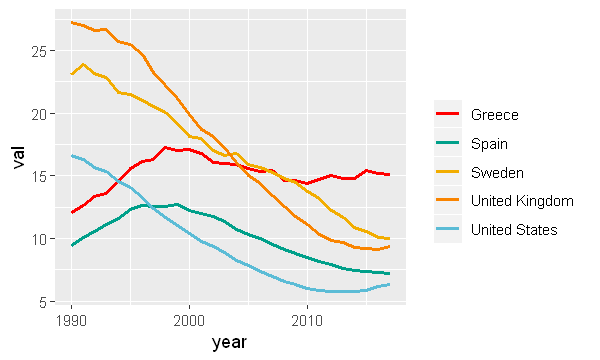

In [89]:
options(repr.plot.width = 5, repr.plot.height = 3)

df  %>% 
    filter(sex == 'Male', measure == 'Deaths')  %>%
    filter(location %in% c('Sweden', 'Spain', 'Greece', 'United Kingdom', 'United States'))  %>% 
    ggplot(aes(y = val, x = year, group = sex, col = location)) +
    geom_line(aes(group = location), size = 1) +
    scale_color_manual(values = wes_palette('Darjeeling1')) +
    labs(col = '')

In [94]:
vars_select(df$location, contains('World Bank'))

ERROR: Error in vars_select(df$location, contains("World Bank")): could not find function "vars_select"


In [140]:
df  %>% 
    filter(str_detect(location, 'World Bank'), measure == 'Deaths', sex == 'Male')  %>% 
    filter(location != 'World Bank Income Levels')  %>%
    filter(location != 'World Bank Regions')  %>% 
    ggplot(aes(x = year, y = val, group = location, col = location)) + 
    geom_line(size = 1) +
    scale_color_manual(values = wes_palette('Darjeeling1'), 
                       labels = c('High Income', 'Low Income', 'Lower Middle Income', 'Upper Middle Income')) +
    labs(col = '') + theme(legend.position = c(0.8, 0.8)) -> p1

In [146]:
df  %>% 
    filter(location %in% c('Sweden', 'Finland', 'United States', 'United Kingdom', 'Armenia'),
           measure == 'Deaths', sex == 'Male')  %>% 
    filter(location != 'World Bank Income Levels')  %>% 
    ggplot(aes(x = year, y = val, group = location, col = location)) + 
    geom_line(size = 1) +
    scale_color_manual(values = wes_palette('Darjeeling1')) +
    labs(col = '') -> p2

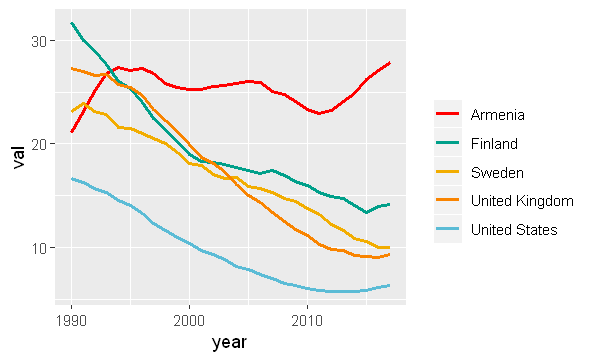

In [147]:
options(repr.plot.width = 5, repr.plot.height = 3)

p2

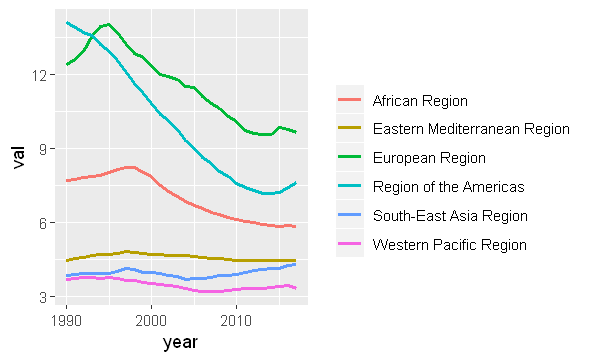

In [113]:
df  %>% 
    filter(str_detect(location, 'Region'),
           measure == 'Deaths',
           sex == 'Male')  %>% 
    filter(!location %in% c('Four World Regions', 'Nordic Region', 'World Bank Regions'))  %>% 
    ggplot(aes(x = year, y = val, group = location, col = location)) + 
    geom_line(size = 1) +
    labs(col = '')